# Problem 3

In [5]:
%cd 'drive/MyDrive/DIP/'

[Errno 2] No such file or directory: 'drive/MyDrive/DIP/'
/content


In [6]:
!pwd

/content


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import skimage.metrics

(-0.5, 511.5, 681.5, -0.5)

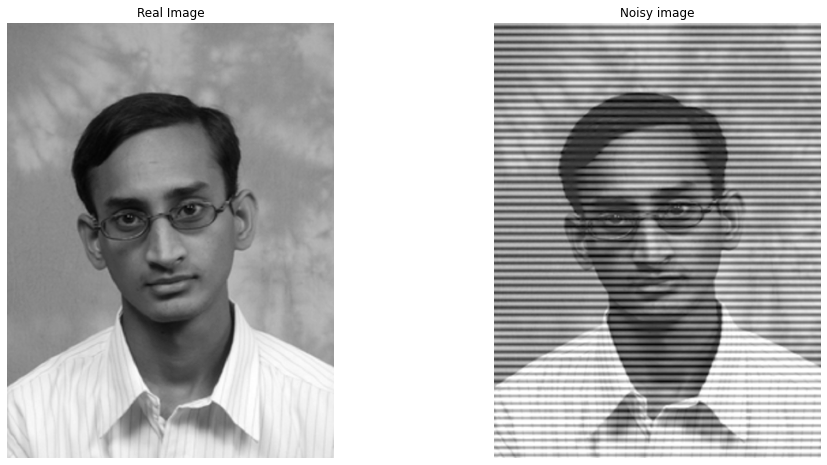

In [8]:
## read and take a look to images here ##
fig = plt.figure(figsize= (16, 8))
cols = 2
rows = 1
fig.add_subplot(rows , cols , 1)
real = cv2.imread('NoNoise.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(real, cmap='gray')
plt.title('Real Image')
plt.axis('off')

fig.add_subplot(rows , cols , 2)
image = cv2.imread('NoisyImg.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Noisy image')
plt.axis('off')



# Remove noise by DFT

In [9]:
# define functions #
def dft(image):
    return np.fft.fft2(image)

def shift_fft(dft):
    return np.fft.fftshift(dft)

def reverse_shift(shifted_image):
    return np.fft.ifftshift(shifted_image)

def idft(image):
    return np.fft.ifft2(image)

mse=146.9158876627812
psnr=26.46011597404545
ssim=0.6650605941002975


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


<Figure size 432x288 with 0 Axes>

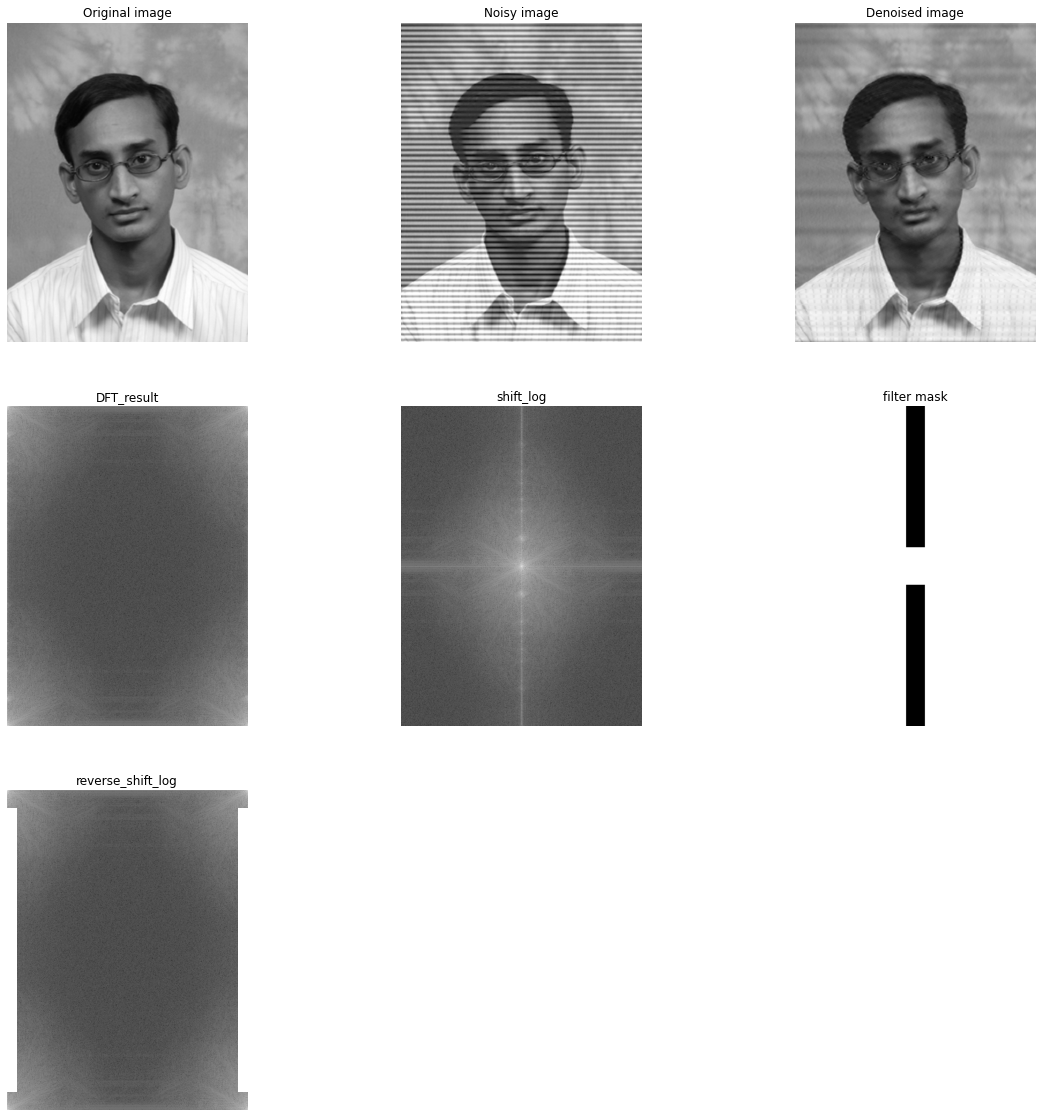

In [10]:
# enhance image #
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
t = 20
r = 40
mask[:crow-r,ccol-t:ccol+t]=0
mask[crow+r:,ccol-t:ccol+t]=0

dft_img = dft(image)
dft_log = 20*np.log(np.abs(dft_img))

shift_img = shift_fft(dft_img)
shift_log = 20*np.log(np.abs(shift_img))

masked_fft = shift_img * mask
reverse_shifte_img = reverse_shift(masked_fft)
reverse_shifte_log = 20*np.log(np.abs(reverse_shifte_img))

img_back = idft(reverse_shifte_img)
img_back = img_back.real





# evaluate by criteries #
mse = skimage.metrics.mean_squared_error(img_back,real)
psnr = skimage.metrics.peak_signal_noise_ratio(real,img_back)
ssim = skimage.metrics.structural_similarity(img_back,real)

print("mse={}".format(mse))
print("psnr={}".format(psnr))
print("ssim={}".format(ssim))




# show per step result #
plt.gray()
fig = plt.figure(figsize = (20,20))
cols = 3
rows = 3
fig.add_subplot(rows , cols , 1)
plt.imshow(real)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(image)
plt.axis('off')
plt.title("Noisy image")

fig.add_subplot(rows , cols , 3)
plt.imshow(img_back)
plt.axis('off')
plt.title("Denoised image")

fig.add_subplot(rows , cols , 4)
plt.imshow(dft_log)
plt.axis('off')
plt.title("DFT_result")

fig.add_subplot(rows , cols , 5)
plt.imshow(shift_log)
plt.axis('off')
plt.title("shift_log")

fig.add_subplot(rows , cols , 6)
plt.imshow(mask)
plt.axis('off')
plt.title("filter mask")

fig.add_subplot(rows , cols , 7)
plt.imshow(reverse_shifte_log)
plt.axis('off')
plt.title("reverse_shift_log")

plt.show()

# Remove Noise by DCT

In [11]:
from scipy.fftpack import dct, idct
from skimage.io import imread
from skimage.color import rgb2gray

In [12]:
# define functions #
def dct_transform(image):
    return dct(image)


def idct_transform(image):
    return idct(image)


  

mse=1312918244.1128201
psnr=-43.05157322391309
ssim=6.5485960302937795e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


<Figure size 432x288 with 0 Axes>

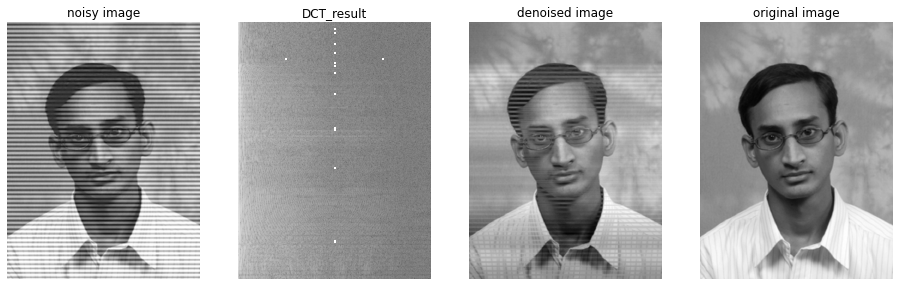

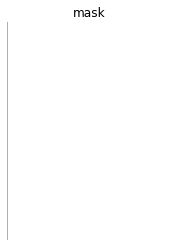

In [13]:
# enhance  image # 
rows, cols = image.shape

mask = np.ones((rows, cols), np.uint8)
mask[:,:1]=0

img_DCT = dct_transform(image)
DCT_log = np.log(np.abs(img_DCT))

masked_DCT = img_DCT * mask
masked_DCT_log = np.log(np.abs(masked_DCT))

enhanced_image = idct_transform(masked_DCT)


# evaluate by criteries #
mse = skimage.metrics.mean_squared_error(enhanced_image,real)
psnr = skimage.metrics.peak_signal_noise_ratio(real,enhanced_image)
ssim = skimage.metrics.structural_similarity(enhanced_image,real)

print("mse={}".format(mse))
print("psnr={}".format(psnr))
print("ssim={}".format(ssim))


# plot original and reconstructed images and dct result with matplotlib
plt.gray()
fig = plt.figure(figsize = (20,20))
cols = 5
rows = 2
fig.add_subplot(rows , cols , 1)
plt.imshow(image)
plt.axis('off')
plt.title("noisy image")
fig.add_subplot(rows , cols , 2)
plt.imshow(DCT_log)
plt.axis('off')
plt.title("DCT_result")
fig.add_subplot(rows , cols , 3)
plt.imshow(enhanced_image)
plt.axis('off')
plt.title("denoised image")
fig.add_subplot(rows , cols , 4)
plt.imshow(real)
plt.axis('off')
plt.title("original image")
plt.show()
fig.add_subplot(rows , cols , 5)
plt.imshow(mask)
plt.axis('off')
plt.title("mask")
plt.show()